(mii7, doa24, ekb72, idm22)

**Data description**

**What are the observations (rows) and the attributes (columns)?**
```
Rows:
Each observation is a metric of a specific team’s performance

Column:

Squad: Unique identifier of the representative team for each country involved in the competition.
Matches Played: Number of matches played in the tournament
Wins: Number of games won in the tournament
Draws: Number of games drawn in the tournament
Losses: Number of games lost in the tournament
Goals For: Number of goals scored 
Goals Against: Number of goals conceded
Goal Differential: Goals For - Goals Against
Points: 3 for a win, 1 for a draw, 0 for a loss
Expected Goals:

“A team's xG differential (xG minus xG allowed) can indicate how a team should be performing. A negative goal differential but a positive xG differential might indicate a team has experienced poor luck or has below average finishing ability.”
Expected Goals Against:
Expected Goal Differential:
Expected Goal Differential per 90 Minutes:
```

**Why was this dataset created?**
The original dataset was created to document game statistics for international football teams that participated in the 2018 FIFA World Cup Tournament.

**Who funded the creation of the dataset?**
FIFA (Fédération Internationale de Football Association )

**What processes might have influenced what data was observed and recorded and what was not?**
There is the potential for uncertainty surrounding the outcome of tournament games/matches to influence observed data.

**What preprocessing was done, and how did the data come to be in the form that you are using?** 
As part of our data preprocessing procedures, we have handled various  inconsistencies found within our dataset. These inconsistencies were mainly observed in  labeling and naming conventions. For instance, the dataset had country codes of varying lengths with some of them included in the same cell as their respective country name. Our data filtering process included making separate cells for both country name and country code for consistency within the dataset. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
Involved parties primarily include  football players in teams eligible to play for FIFA . Their awareness of this data collection is implicit with their choice to participate in the FIFA World Cup Tournament (as player athletic performances are conventionally recorded). Usually this type of data is collected for media representatives, soccer club employees, soccer enthusiasts, as well as those partaking in sport related gambling. 

**Where can your raw source data be found, if applicable?**
https://fbref.com/en/comps/1/FIFA-World-Cup-Stats#all_stats_standard_squads


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

**Read in dataset on FIFA World Cup Tournament performance**

In [2]:
fifa = pd.read_csv("fifa.csv").dropna()
#fifa.head

**Read in health dataset on Country GDP and Life expectancy**

In [3]:
country_spec = pd.read_csv("2018.csv")

**Filter dataset and prepare for merge**

In [4]:
filtered_countries = pd.DataFrame(country_spec, columns = ['Country or region','GDP per capita', 'Healthy life expectancy'])
filtered_countries = filtered_countries.rename(columns={'Country or region':'Squad'})

In [5]:
fifa_data = pd.merge(fifa, filtered_countries, on='Squad')
set1 = set()
for i in fifa_data["Squad"]:
    set1.add(i)
for x in fifa["Squad"]:
    if x not in set1:
        print("Naming descrepancy found! -->",x)

Naming descrepancy found! --> England
Naming descrepancy found! --> Korea Republic


While filtering our FIFA data to merge country health information with the countries represented in our country_spec dataset, we discovered that "South Korea" and "England" were represented as “Korea Republic” and “United Kingdom” respectively. 

We decided that the health information and other country specifics of the United Kingdom would serve our purposes in representing the state of England. As for South Korea, Korea Republic is simply the name of the country's soccer team. For this reason, we changed their names to “South Korea” and “United Kingdom” respectively for the data merge. 

Although this mismatch was resolved by a simple name change, we believe that it is important to acknowledge the significance of the differences in naming. Because the naming in our country_spec dataset refers to broader geographical regions, we decided to abide by the names used in this dataset.

In [6]:
fifa["Squad"].replace({"Korea Republic":"South Korea", "England":"United Kingdom"}, inplace=True)
fifa_data = pd.merge(fifa, filtered_countries, on='Squad')
fifa_data.head(32)

,Rk,Squad,Matches Played,Wins,Draw,Losses,Goals For,Goals Allowed,Goal Difference,Points,Expected Goals,Expected Goals Allowed,Expected Goal Differential,Expected Goals Differential per 90 Minutes,GDP per capita,Healthy life expectancy
0,1,France,7.0,6.0,1.0,0.0,14.0,6.0,8.0,19.0,8.1,4.8,3.3,0.47,1.293,0.908
1,2,Croatia,7.0,4.0,2.0,1.0,14.0,9.0,5.0,14.0,15.4,11.8,3.5,0.44,1.115,0.737
2,3,Belgium,7.0,6.0,0.0,1.0,16.0,6.0,10.0,18.0,11.6,8.9,2.7,0.39,1.324,0.894
3,4,United Kingdom,7.0,3.0,1.0,3.0,12.0,8.0,4.0,10.0,12.3,8.7,3.7,0.48,1.244,0.888
4,QF,Uruguay,5.0,4.0,0.0,1.0,7.0,3.0,4.0,12.0,5.7,2.1,3.6,0.73,1.093,0.771
5,QF,Brazil,5.0,3.0,1.0,1.0,8.0,3.0,5.0,10.0,11.7,2.4,9.3,1.87,0.986,0.675
6,QF,Sweden,5.0,3.0,0.0,2.0,6.0,4.0,2.0,9.0,6.6,3.9,2.7,0.54,1.355,0.913
7,QF,Russia,5.0,2.0,2.0,1.0,11.0,7.0,4.0,8.0,8.7,10.2,-1.5,-0.27,1.151,0.599
8,R16,Colombia,4.0,2.0,1.0,1.0,6.0,3.0,3.0,7.0,4.8,7.2,-2.5,-0.57,0.960,0.635
9,R16,Denmark,4.0,1.0,3.0,0.0,3.0,2.0,1.0,6.0,5.3,8.7,-3.4,-0.79,1.351,0.868


These are some guiding questions for the analysis:

. How are we grouping the data? By "Rk", by region?, are we incorporating other data?
. What are the trends we are trying to see?
. Do we want to ask if a losing team could potentially beat the champion team?


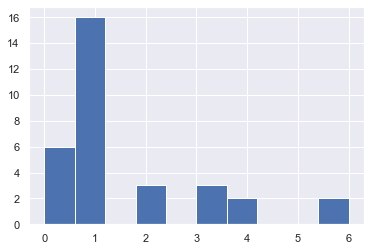

In [7]:
#Creating a histogram of Wins
plt.hist(fifa["Wins"])
plt.show()

In [ ]:
z = np.random.geometric(p=0.5, size=100000000)
print (z)
unique, counts = np.unique(z, return_counts=True)
counts = dict(zip(unique, counts/100000000))
print (counts)
print (np.unique(z))
print (len(z))
plt.hist(z, bins=18)
plt.show()

[1 1 1 ... 1 2 1]
{1: 0.50002169, 2: 0.24998757, 3: 0.12498453, 4: 0.06253265, 5: 0.03125578, 6: 0.01562648, 7: 0.00780275, 8: 0.00389991, 9: 0.00194106, 10: 0.00097167, 11: 0.00049138, 12: 0.00024045, 13: 0.00012364, 14: 6.036e-05, 15: 3.024e-05, 16: 1.484e-05, 17: 7.53e-06, 18: 3.76e-06, 19: 1.92e-06, 20: 9.2e-07, 21: 4.9e-07, 22: 1.6e-07, 23: 1.1e-07, 24: 6e-08, 25: 4e-08, 31: 1e-08}


https://arxiv.org/pdf/1803.09010.pdf). We expect the total length should be 1500-3000 words. Inside this range, length will not be a factor in grading.

The Introduction should be the exposition of the article where you can use less rigorous language. Your language should be generally accessible. Aim for this to be readable by someone who hasn't taken this class (maybe your roommate, your family, or you at the start of the semester). It should still be formal, but someone should come to the end and want to read more. 538 articles (fivethirtyeight.com) might be a good baseline tone for this.

Advanced introductions will immediately tell us what the setting is, what you found, and why it matters. They will add details as they are needed. Language will be polished and free from errors (Note: if your group does not include a native English speaker, make a note of that). Beginning writeups will be less focused and organized. They may jump to technical details without explaining why results are important. They may have spelling and grammatical errors, or awkward or incomplete sentences, indicating that they were written in haste and never reviewed.

Datasheet: As described above, in the style of Gebru et al. Think of this as the “origin story” of your data set. Answer all of the questions listed in the previous section. You can write this in any style as long as it's easy to read as a Q&A. Datasheet will be graded on content, not style. Follow sections 3.1- 3.5 (Motivation to Uses) from https://arxiv.org/pdf/1803.09010.pdf.

Data analysis and evaluation of significance: Here you will clearly detail your methods used in each part. Qualitative claims made in the exposition should have numerical backing here (instead of “X is larger than Y” write “X is 3.65 times larger than Y”). This should read like a scientific paper, but does not need to be "stuffy" or overly indirect: "we did ..." is more natural than "... was done". A reader should be able to replicate your experiments and findings via their own code after reading this.

It’s important to organize your analysis. Common organizational patterns: 

Big to small. Start with a high-level description of the complete dataset, then add more detail and increase specificity until you are looking at individual data points.
Small to big. The opposite: start with individual data points, then “zoom out” progressively until you get to a broad, top-level overview.
Bites at the apple. Visit different facets of the dataset. This could be subsets of the observations along different criteria, or a series of aggregate views where you are grouping by different variables (eg alumni by state, then by industry, then by major).

In most cases you will try many possible analyses. You don't have to report everything that you did. Find a good selection that makes sense. In most datasets there are potentially thousands of different functions that you could analyze. Why are the ones you chose the most interesting?

Advanced analyses will be clear, logical, and methodical. Mathematical modeling will have clear purpose that answers relevant questions and contributes to an overall perspective. Results will be contextualized with significance tests or comparisons to alternative simpler explanations. Reasonable "next questions" should be followed or acknowledged, though you don't have to follow every lead. Beginning analyses will be disorganized and haphazard. They will apply models without context or purpose. They report results without considering whether those results are meaningful or random noise.

Code: As notebooks with evaluated cells. We won't run them or attempt to debug errors. The most crucial part is to comment your code so that we can quickly understand what it does. This doesn't need to be exhaustive, but you should be keeping your reader updated on what's going on every few lines. Some code may be oriented towards pre-processing and data curation, other code may be oriented towards analysis and presentation of results.

Advanced code will be succinct and well-organized, with comments that indicate expected uses and assumptions for inputs and outputs. Repeated tasks will be broken into functions. Variable names will be informative. Points of failure are anticipated and checked for.

Beginning code will be unclear and disorganized, possibly with large sections of unused code. Variable names will be ambiguous or misleading. Comments will be missing or will simply repeat information that is obvious from context. Variables will be short and uninformative.

Conclusions should reflect on what you accomplished and where you might go from here. These can be hard to write without feeling repetitive. The conclusion is a good place to mention things that you tried that did not work, or data that you could not find but that you would add in a hypothetical further version.

A common question is "do I need to ... to get a good grade?" 

It's an open-ended project with additive grading. We only give points for what you do, we never take points off for what you don't do. There are many things that we consider difficult (combining multiple datasets, reformatting data, collecting from web pages), so if you find that any of them make sense, we will recognize that in our consideration of how ambitious you are. None of them are required.

What we want you to do is make an argument based on a data set. If the perfect data set already exists, great! You have more time to work on the details of the modeling and the presentation. In many cases the data set you want doesn't exist in the form you are looking for, and you need to do some work to create it. We want you to have tools to do that if needed. But even if you think you have exactly the data you want, you may find that in investigating it you realize that there are additional questions that require more data collection.

Students often find this kind of open-ended project difficult because it requires more independence and feels more risky. We've built in multiple low-stakes checkpoints to help make sure we give you feedback and reduce the feeling of "flying blind". But it's also the most realistic and valuable experience to prepare you for what you will do after graduation, and the thing that alums most often remember years later.

I also recognize that doing open-ended projects is more difficult than it has been other years. It's harder to meet with teammates and with course staff. We will take this into account when giving final scores.
